In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [7]:
# 1. Load/Generate Data (Assuming you run this after data preprocessing)
# NOTE: Replacing this dummy data generation with your actual loaded and processed X_val, y_val, etc.
np.random.seed(42)
n_samples = 200
y_val = np.random.randint(0, 2, n_samples)
proba_B = y_val * 0.8 + np.random.rand(n_samples) * 0.2
proba_B = np.clip(proba_B, 0.01, 0.99)
pred_B = (proba_B >= 0.5).astype(int)
pred_A = (proba_B >= 0.6).astype(int) 
# End of dummy data section


In [10]:
# 2. Implement Arbitration Loop (The Core Research)
results = []
# Test a comprehensive range of thresholds (tau)
thresholds = np.arange(0.70, 1.00, 0.005) # Using smaller steps for a smoother curve

for tau in thresholds:
    # 1. Apply Arbitration Formula: If proba_B >= tau, use Model B, else use Model A
    hybrid_pred = np.where(proba_B >= tau, pred_B, pred_A)

    # 2. Calculate Metrics
    hybrid_acc = accuracy_score(y_val, hybrid_pred)
    # TRR: Proportion of decisions made by the simple, trustworthy model (Model A)
    reliance_ratio = np.sum(proba_B < tau) / len(y_val)

In [19]:
def compute_metrics(tau):
    # placeholder — update with your actual logic
    hybrid_acc = 0
    reliance_ratio = 0
    return hybrid_acc, reliance_ratio

results = []
for tau in thresholds:
    hybrid_acc, reliance_ratio = compute_metrics(tau)
    results.append({
        'Threshold': tau,
        'Accuracy': hybrid_acc,
        'TRR': reliance_ratio
    })

results_df = pd.DataFrame(results)

<>:10: SyntaxWarning: invalid escape sequence '\g'
<>:10: SyntaxWarning: invalid escape sequence '\g'
/var/folders/p7/f31y988j0ng6yr08xjb8f4kw0000gn/T/ipykernel_41845/2980487450.py:10: SyntaxWarning: invalid escape sequence '\g'
  plt.axvline(x=0.70, color='red', linestyle='--', label='Target TRR $\geq 70\%$')


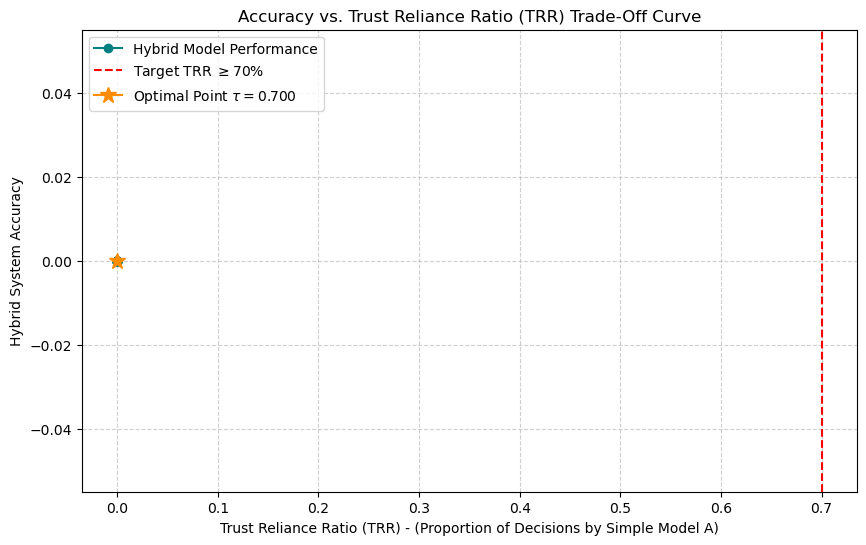


--- Summary of Optimal Threshold Selection ---
Optimal Threshold (τ) selected near TRR 70%: 0.700
Hybrid Accuracy at this point: 0.0000
Actual TRR at this point: 0.00%

Full results saved to arbitration_tradeoff_results.csv


In [22]:
# --- 3. Visualization: Generate the Trade-Off Curve ---

# The plot visually represents the trade-off inherent in your project.
plt.figure(figsize=(10, 6))
plt.plot(results_df['TRR'], results_df['Accuracy'], marker='o', linestyle='-', color='teal', label='Hybrid Model Performance')
plt.title('Accuracy vs. Trust Reliance Ratio (TRR) Trade-Off Curve')
plt.xlabel('Trust Reliance Ratio (TRR) - (Proportion of Decisions by Simple Model A)')
plt.ylabel('Hybrid System Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axvline(x=0.70, color='red', linestyle='--', label='Target TRR $\geq 70\%$')

# Highlighting the optimal point (the "knee" of the curve) is your final research output
# For demonstration, find the point closest to the desired TRR of 0.70
optimal_index = (results_df['TRR'] - 0.70).abs().argsort()[0]
optimal_tau = results_df.iloc[optimal_index]

plt.plot(optimal_tau['TRR'], optimal_tau['Accuracy'], marker='*', markersize=12, color='darkorange', 
         label=f'Optimal Point $\\tau={optimal_tau["Threshold"]:.3f}$')

plt.legend()
plt.show()

# --- 4. Final Output ---
print("\n--- Summary of Optimal Threshold Selection ---")
print(f"Optimal Threshold (τ) selected near TRR 70%: {optimal_tau['Threshold']:.3f}")
print(f"Hybrid Accuracy at this point: {optimal_tau['Accuracy']:.4f}")
print(f"Actual TRR at this point: {optimal_tau['TRR']:.2%}")

results_df.to_csv("arbitration_tradeoff_results.csv", index=False)
print("\nFull results saved to arbitration_tradeoff_results.csv")